In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
pd.options.display.max_columns = 14
train = pd.read_csv('train_2013.csv')
test = pd.read_csv('test_2014.csv')
submission = pd.read_csv('sampleSubmission.csv')
# Any results you write to the current directory are saved as output.

In [ ]:
pd.options.display.max_columns = 20
train.tail()

In [ ]:
test.head()

In [ ]:
submission.head()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.shape

In [ ]:
sns.distplot(train['Expected'].head(100))

In [ ]:
train['Expected'].value_counts().sort_values(ascending=False)

In [ ]:
print(train.shape)
sum(train['Expected']>69)

In [ ]:
train.isnull().any()

In [ ]:
test.isnull().any()

In [ ]:
train.drop(train.index[train['Expected']>69],axis = 0, inplace = True)

In [ ]:
train['Prediction'] = np.ceil(train['Expected'])
train['Prediction'] = train['Prediction'].astype(np.int8)

In [ ]:
pd.options.display.max_columns = 100
train.head(n=40)

In [ ]:
# train['TimeToEnd1'] = train['TimeToEnd'].apply(lambda x:' '.
#                                                join(list(map(lambda x: str(60.0-x),
#                                                              list(map(float, x.split()))))))

In [ ]:
test['num_observation'] = test['TimeToEnd'].apply(lambda x:len(x.split()))

In [ ]:
train['num_observation'] = train['TimeToEnd'].apply(lambda x:len(x.split()))
train.head(n=1)

#### Feature Engineering on features RR1, RR2, RR3

In [ ]:
train['RR1'] = train['RR1'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
train['RR2'] = train['RR2'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
train['RR3'] = train['RR3'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
test['RR1'] = test['RR1'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
test['RR2'] = test['RR2'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
test['RR3'] = test['RR3'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
train['RR1_mean'] = train['RR1'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
train['RR2_mean'] = train['RR2'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
train['RR3_mean'] = train['RR3'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
test['RR1_mean'] = test['RR1'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
test['RR2_mean'] = test['RR2'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
test['RR3_mean'] = test['RR3'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
train['RR_mean'] = (train['RR1_mean']+train['RR2_mean']+train['RR3_mean'])/3
test['RR_mean'] = (test['RR1_mean'] + test['RR2_mean'] + test['RR3_mean'])/3

In [ ]:
train.drop(train.index[train['RR_mean']>300], inplace = True)

In [ ]:
sns.set(rc={'figure.figsize':(13.7,6.27)})
# sns.barplot(x = train['Prediction'], y = train['RR1_mean'])
sns.distplot(train['Prediction'],bins = 1,hist = True)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x = train['RR_mean'], y = train['Expected'], fit_reg = False)

#### RadarQualityIndex

In [ ]:
test['RadarQualityIndex'] = test['RadarQualityIndex'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:1 if x >1.0 else 0.0 if x<0.0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
train['RadarQualityIndex'] = train['RadarQualityIndex'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x >1.0 else 0.0 if x<0.0 else x, 
                                                             list(map(float, x.split()))))))))

In [ ]:
train['RadarQualityIndex_mean'] = train['RadarQualityIndex'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
test['RadarQualityIndex_mean'] = test['RadarQualityIndex'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [ ]:
train.tail(n=40)

In [ ]:
sns.regplot(x = train['RadarQualityIndex_mean'], y = train['Expected'], fit_reg = False)

In [ ]:
g = sns.boxplot(x =train['Prediction'], y = train['RR1_mean'])
g.set

In [ ]:
sns.boxplot(x =train['Prediction'], y = train['RR_mean'])

In [ ]:
pd.options.display.max_rows = 200
train[['RR1_mean','RR_mean','Expected','num_observation','MassWeightedMean','TimeToEnd']].head(n = 100)

In [ ]:
# plt.scatter(x = train['RR3_mean'], y = train['Expected'])
# plt.show()

In [ ]:
# corrmat = train[['Expected','RR1_mean', 'RR2_mean','RR3_mean']].corr()
# display(corrmat)
# corrmat.sort_values("Expected",inplace = True, ascending = False)
# sns.heatmap(corrmat, vmax=.8, square=True)

#### LogWaterVolume

In [ ]:
train['LogWaterVolume'] = train['LogWaterVolume'].apply(lambda x:str(x))
train['LogWaterVolume'] = train['LogWaterVolume'].apply(lambda x:' '.join(list(map(str, list
                                                                          (map(lambda x:
                                                                              0 if np.isnan(x) else x,
                                                                              list(map(float, x.split()))))))))

In [ ]:
test['LogWaterVolume'] = test['LogWaterVolume'].apply(lambda x:str(x))
test['LogWaterVolume'] = test['LogWaterVolume'].apply(lambda x:' '.join(list(map(str, list
                                                                          (map(lambda x:
                                                                               0 if np.isnan(x) else x,
                                                                              list(map(float, x.split()))))))))

In [ ]:
train['LogWaterVolume_mean'] = train['LogWaterVolume'].apply(lambda x:(np.mean(list(map(float,
                                                                                              x.split())))))

In [90]:
test['LogWaterVolume_mean'] = test['LogWaterVolume'].apply(lambda x:(np.mean(list(map(float, 
                                                                                            x.split())))))

#### ReflectivityQC

In [49]:
train['ReflectivityQC'] = train['ReflectivityQC'].apply(
    lambda x: ' '.join(map(str, list(map(lambda x:0 if x<0 else x, list(map(float, x.split())))))))

In [50]:
test['ReflectivityQC'] = test['ReflectivityQC'].apply(
    lambda x: ' '.join(map(str, list(map(lambda x:0 if x<0 else x, list(map(float, x.split())))))))

In [51]:
train['ReflectivityQC_mean'] = train['ReflectivityQC'].apply(lambda x: np.mean(list(map(float, x.split()))))

In [52]:
test['ReflectivityQC_mean'] = test['ReflectivityQC'].apply(lambda x: np.mean(list(map(float, x.split()))))

In [53]:
train.head(n = 2)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction,num_observation,RR1_mean,RR2_mean,RR3_mean,RR_mean,RadarQualityIndex_mean,LogWaterVolume_mean,ReflectivityQC_mean
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,0 0 0 0 0 0 0 0,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,-100000 -100000 -100000 -100000 -100000 -10000...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0,0,8,0.0,0.0,0.0,0.0,0.056994,0.0,0.0
1,2,58.0 48.0 38.0 29.0 19.0 9.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0,0 0 0 0 0 0,0 0 0 0 0 0,15.0 18.5 10.5 3.0 0.5 -3.0,0 0 0 0 0 0,0.635 0.851667 0.891667 0.638333 0.791667 0.73...,-4.0 -3.0 -2.0 -0.5 -4.0 3.0,2.6875 3.0 2.375 6.25 3.125 6.0625,-100000 -100000 -100000 -100000 -100000 -100000,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0,6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


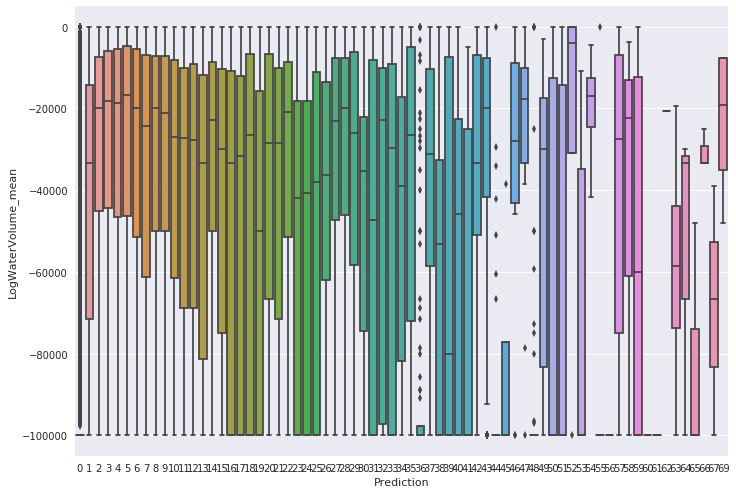

In [92]:
sns.boxplot( y = train['LogWaterVolume_mean'], x = train['Prediction'])

#### Removing Outliers

In [55]:
# Removing Outlier in Logwater_mean
train.drop(train.index[train['LogWaterVolume_mean']>0.0075], inplace =True)

In [56]:
train['LogWaterVolume_mean'].value_counts()

0.000000e+00    1081231
9.788135e-07         35
7.264895e-07         31
9.418848e-07         30
1.198357e-06         29
1.299869e-06         29
8.175407e-07         29
6.843190e-07         28
5.161168e-07         27
5.825364e-07         27
2.758016e-06         25
2.146298e-06         25
1.210380e-06         24
4.498752e-07         24
1.308902e-06         24
1.171766e-06         23
1.640566e-06         23
7.846749e-07         22
3.844792e-06         22
3.561261e-06         21
9.252720e-07         21
8.264902e-07         21
2.030234e-06         20
4.085281e-07         20
7.636151e-07         20
2.423092e-06         20
4.116570e-06         20
2.674971e-06         20
1.899398e-06         20
1.002091e-06         19
                 ...   
8.438829e-07          1
7.267793e-06          1
9.862263e-06          1
8.588737e-06          1
9.410893e-06          1
3.298207e-05          1
7.743883e-07          1
2.267390e-05          1
2.662681e-06          1
3.336476e-05          1
4.336412e-06    

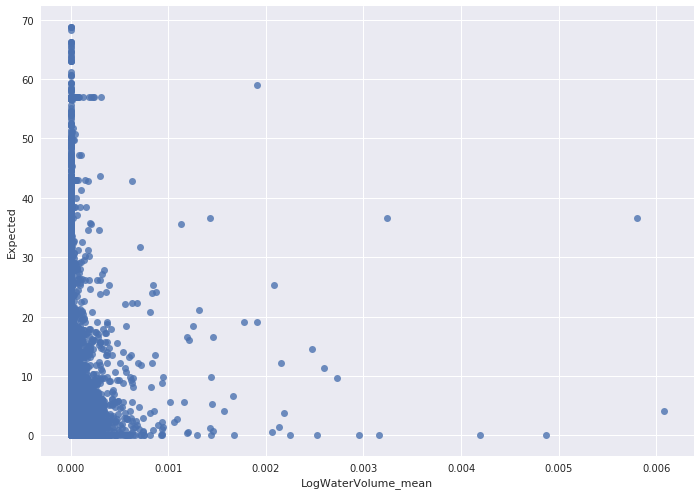

In [57]:
sns.regplot(x = train['LogWaterVolume_mean'], y = train['Expected'], fit_reg=False)

### Preparing Training and Test Data

In [57]:
X = train[['RadarQualityIndex_mean','LogWaterVolume_mean', 'RR_mean'
           ,'ReflectivityQC_mean','num_observation']]
X.shape

(1121083, 8)

In [58]:
y = train['Prediction']
y.head(n=20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     6
8     0
9     0
10    2
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Prediction, dtype: int8

In [59]:
test.isnull().any()

Id                        False
TimeToEnd                 False
DistanceToRadar           False
Composite                 False
HybridScan                False
HydrometeorType           False
Kdp                       False
RR1                       False
RR2                       False
RR3                       False
RadarQualityIndex         False
Reflectivity              False
ReflectivityQC            False
RhoHV                     False
Velocity                  False
Zdr                       False
LogWaterVolume            False
MassWeightedMean           True
MassWeightedSD             True
num_observation           False
RR1_mean                  False
RR2_mean                  False
RR3_mean                  False
RR_mean                   False
RadarQualityIndex_mean    False
LogWaterVolume_mean       False
ReflectivityQC_mean       False
dtype: bool

In [60]:
train.isnull().any()

Id                        False
TimeToEnd                 False
DistanceToRadar           False
Composite                 False
HybridScan                False
HydrometeorType           False
Kdp                       False
RR1                       False
RR2                       False
RR3                       False
RadarQualityIndex         False
Reflectivity              False
ReflectivityQC            False
RhoHV                     False
Velocity                  False
Zdr                       False
LogWaterVolume            False
MassWeightedMean           True
MassWeightedSD             True
Expected                  False
Prediction                False
num_observation           False
RR1_mean                  False
RR2_mean                  False
RR3_mean                  False
RR_mean                   False
RadarQualityIndex_mean    False
LogWaterVolume_mean       False
ReflectivityQC_mean       False
dtype: bool

In [61]:
Test = test[['RR1_mean','RR2_mean','RR3_mean','RadarQualityIndex_mean','LogWaterVolume_mean', 'RR_mean'
           ,'ReflectivityQC_mean','num_observation']]
Test.head(n=2)

,RR1_mean,RR2_mean,RR3_mean,RadarQualityIndex_mean,LogWaterVolume_mean,RR_mean,ReflectivityQC_mean,num_observation
0,0.029185,0.030598,0.011673,0.838384,0.0,0.071456,12.404762,21
1,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1


### Training Model

In [62]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import ensemble
import xgboost as xgb
from sklearn.svm import SVC
xg = xgb.XGBClassifier()
xg.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
print(xg.score(X,y))

0.883677658122


In [64]:
output = xg.predict_proba(Test)
print(output.shape)
print(y.shape)
print(test.shape)

(630452, 69)
(1121083,)
(630452, 27)


In [65]:
output1 = (pd.DataFrame(output)).copy()
s= 'Predicted'
col = []
for i in range(0,69):
    col.append(s+str(i))
output1.columns = col
for i in range(1,69):
    output1[s+str(i)] += output1[s+str(i-1)]
display(output1.tail(n =1))
# print(output)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted11,Predicted12,Predicted13,Predicted14,Predicted15,Predicted16,Predicted17,Predicted18,Predicted19,Predicted20,Predicted21,Predicted22,Predicted23,Predicted24,Predicted25,Predicted26,Predicted27,Predicted28,Predicted29,Predicted30,Predicted31,Predicted32,Predicted33,Predicted34,Predicted35,Predicted36,Predicted37,Predicted38,Predicted39,Predicted40,Predicted41,Predicted42,Predicted43,Predicted44,Predicted45,Predicted46,Predicted47,Predicted48,Predicted49,Predicted50,Predicted51,Predicted52,Predicted53,Predicted54,Predicted55,Predicted56,Predicted57,Predicted58,Predicted59,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68
630451,0.990308,0.996767,0.997323,0.99763,0.997847,0.998094,0.998281,0.998422,0.998509,0.998557,0.998599,0.998628,0.998659,0.99869,0.998794,0.998826,0.998852,0.998872,0.998893,0.998918,0.998932,0.998949,0.998964,0.99898,0.999102,0.99912,0.999139,0.999153,0.999186,0.999221,0.999234,0.99925,0.999263,0.999275,0.999299,0.999312,0.999358,0.999377,0.999392,0.99942,0.999438,0.999452,0.999464,0.999489,0.999507,0.999518,0.99953,0.999542,0.999656,0.999669,0.999681,0.999693,0.999705,0.999716,0.999728,0.99974,0.999752,0.99987,0.999882,0.999893,0.999905,0.999919,0.99993,0.999942,0.999954,0.999965,0.999977,0.999988,1.0


In [66]:
output1['Predicted69'] = output1['Predicted68']

In [67]:
output1['Predicted68'] = output1['Predicted67']

In [68]:
output1.tail(n=1)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted11,Predicted12,Predicted13,Predicted14,Predicted15,Predicted16,Predicted17,Predicted18,Predicted19,Predicted20,Predicted21,Predicted22,Predicted23,Predicted24,Predicted25,Predicted26,Predicted27,Predicted28,Predicted29,Predicted30,Predicted31,Predicted32,Predicted33,Predicted34,Predicted35,Predicted36,Predicted37,Predicted38,Predicted39,Predicted40,Predicted41,Predicted42,Predicted43,Predicted44,Predicted45,Predicted46,Predicted47,Predicted48,Predicted49,Predicted50,Predicted51,Predicted52,Predicted53,Predicted54,Predicted55,Predicted56,Predicted57,Predicted58,Predicted59,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
630451,0.990308,0.996767,0.997323,0.99763,0.997847,0.998094,0.998281,0.998422,0.998509,0.998557,0.998599,0.998628,0.998659,0.99869,0.998794,0.998826,0.998852,0.998872,0.998893,0.998918,0.998932,0.998949,0.998964,0.99898,0.999102,0.99912,0.999139,0.999153,0.999186,0.999221,0.999234,0.99925,0.999263,0.999275,0.999299,0.999312,0.999358,0.999377,0.999392,0.99942,0.999438,0.999452,0.999464,0.999489,0.999507,0.999518,0.99953,0.999542,0.999656,0.999669,0.999681,0.999693,0.999705,0.999716,0.999728,0.99974,0.999752,0.99987,0.999882,0.999893,0.999905,0.999919,0.99993,0.999942,0.999954,0.999965,0.999977,0.999988,0.999988,1.0


In [69]:
output1.insert(0, column='Id',value = submission['Id'])

In [70]:
print(output1.shape)
print(submission.shape)

(630452, 71)
(630452, 71)


In [71]:
output1['Predicted68'][output1['Predicted68']>1.0] = 1
output1['Predicted68'][output1['Predicted68']>1.0]

Series([], Name: Predicted68, dtype: float32)

In [72]:
output1['Predicted69'][output1['Predicted69']>1.0] = 1
output1['Predicted69'][output1['Predicted69']>1.0]

Series([], Name: Predicted69, dtype: float32)

In [73]:
output1.to_csv("prediction_xg.csv",index=False)

In [74]:
print(np.sort(y.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69]
